# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from flixable which is a third-party Netflix search engine. 

The objective of this project is to explore and cluster Netflix movies and TV shows based on their attributes such as genres, release year, duration, and ratings.

The project involves several steps, including data preprocessing, feature engineering, and clustering. In the data preprocessing step, the data is cleaned, missing values are handled, and the data is prepared for further analysis. In the feature engineering step, new features are created from the existing data to better represent the content of the movies and TV shows.

The clustering step involves applying unsupervised machine learning algorithms to the dataset to group the movies and TV shows into similar clusters. The algorithms used for clustering include K-Means, Hierarchical Clustering, and DBSCAN.

Once the movies and TV shows are clustered, visualizations such as scatter plots and dendrograms can be used to analyze the clusters and identify patterns and relationships between them. The insights gained from this project can be used to better understand the content available on Netflix and improve the platform's recommendation system.

Overall, this project provides an interesting opportunity to explore the world of Netflix movies and TV shows using data analysis and machine learning techniques.

# **GitHub Link -**

[GitHub Link](https://github.com/RahulI5/Netflix-Movies-and-TV-Shows-Clustering)

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project we are required to do

1.   Exploratory Data Analysis
2.   Understanding what type content is available in different countries.
3. If Netflix has been increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [164]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as misssno
import string
string.punctuation
import unicodedata
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import TweetTokenizer

from datetime import datetime as dt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

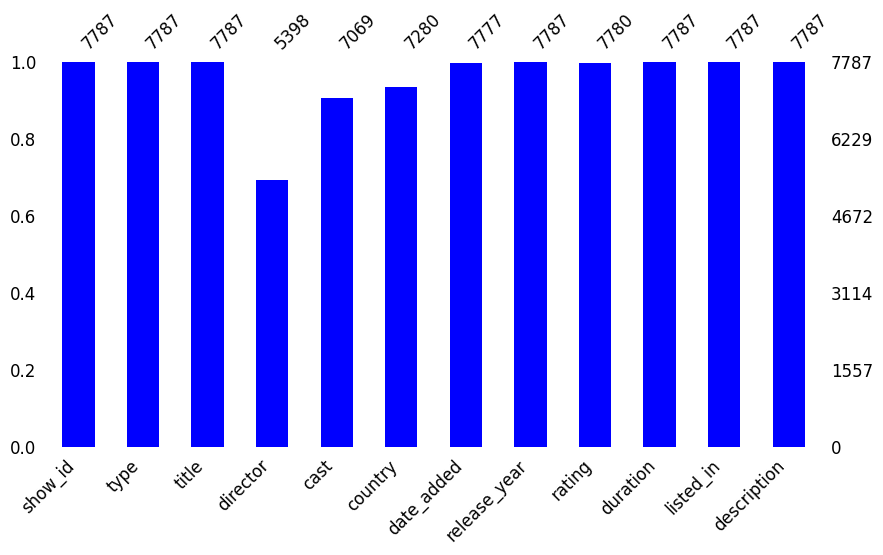

In [ ]:
# Visualizing the missing values
misssno.bar(df, color='blue',figsize=(10,5), fontsize=12)

### What did you know about your dataset?

On the given dataset, There are total of 3,631 null values across the entire dataset with 2,389 missing points under “director” 718 under “cast,” 507 under “country,” 10 under “date_added,” and 7 under “rating.” We have to handle all null data points before we can dive into EDA and modeling. Imputation is a treatment method for missing value by filling it in using certain techniques. Can use mean, mode, or use predictive modeling. In this module, we will discuss the use of the fillna function from Pandas for this imputation. Drop rows containing missing values. Can use the dropna function from Pandas.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Top countries
df.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
# Top 10 genres 
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10)

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: listed_in, dtype: int64

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Filling null values of features director, cast and country
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Dropping null values from date added and rating columns
df.dropna(subset=["date_added","rating"],inplace=True)

* Since there are many null values for features like director, cast, and country, 
those null values cannot be dropped; instead, they have been substituted with director Unavailable, Cast Unavailability, and Country Unavailable, accordingly.
* Features such as date_added and rating have a very low number of null values, so we dropped those null values.

In [ ]:
# Typecasting date_added from string to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors= 'coerce')

In [ ]:
# Adding new features month and year from date added column
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

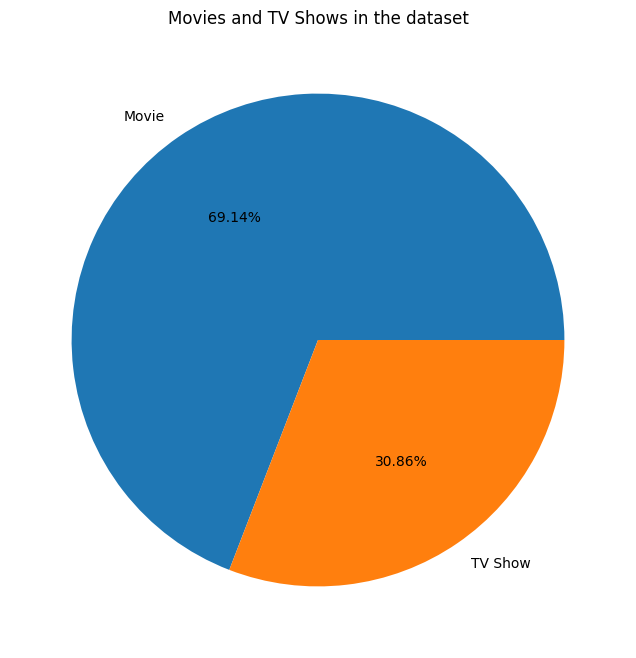

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,8))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

A pie plot is a proportional representation of the numerical data in a column.

##### 2. What is/are the insight(s) found from the chart?

On the above chart, there are 69.14% share of Movies while on the other hand 30.86% of TV Shows.

#### Chart - 2

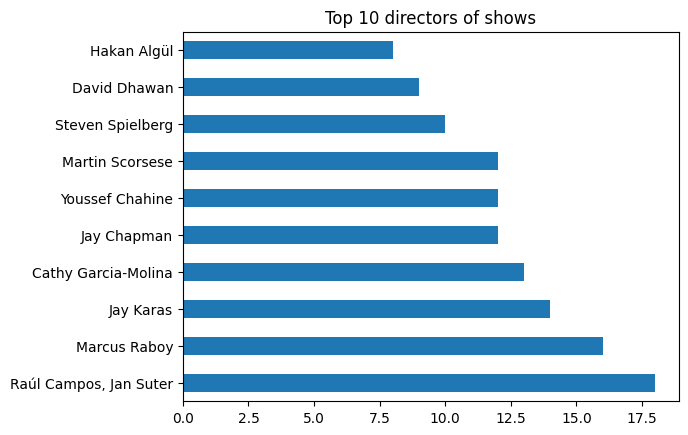

In [ ]:
# Chart - 2 visualization code
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors of shows')
plt.show()

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos, Jan Suter directed most number of TV Shows & Movies.

#### Chart - 3

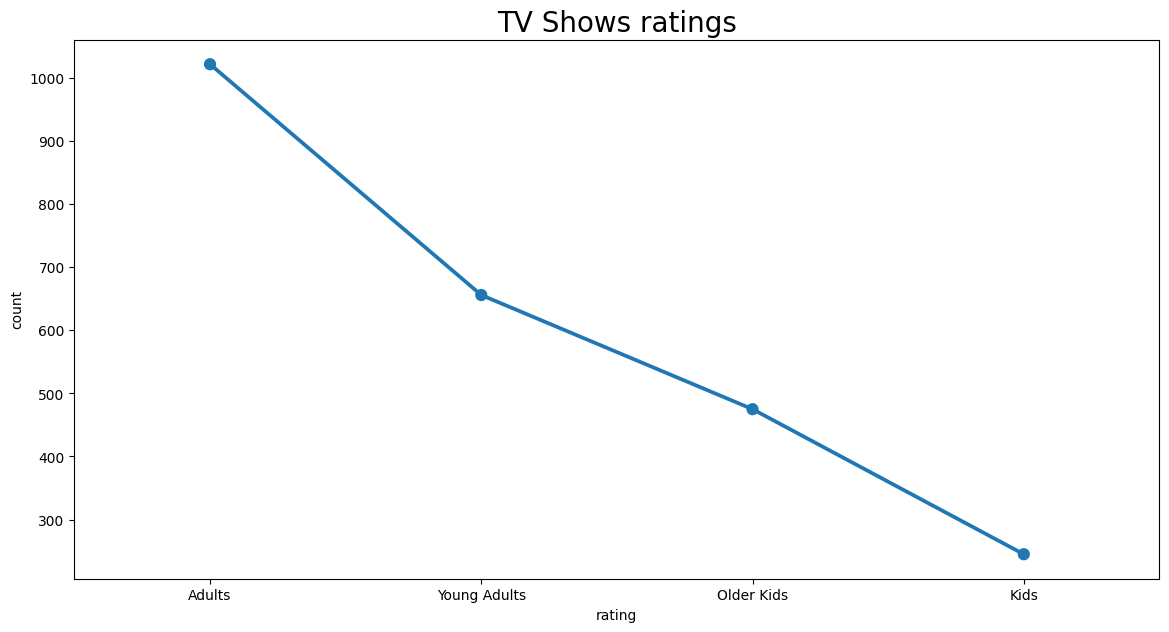

In [ ]:
# Chart - 3 visualization code
tv_shows = df[df['type']=='TV Show']


tv_rating = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)            
sns.pointplot(x= 'rating',y = 'count',data= tv_rating)
plt.title('TV Shows ratings', size= 20)
plt.show()

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

On the above plot, we can see that number of adults have the highest number of TV Shows among the different age groups.

#### Chart - 4

<Axes: xlabel='count', ylabel='release_year'>

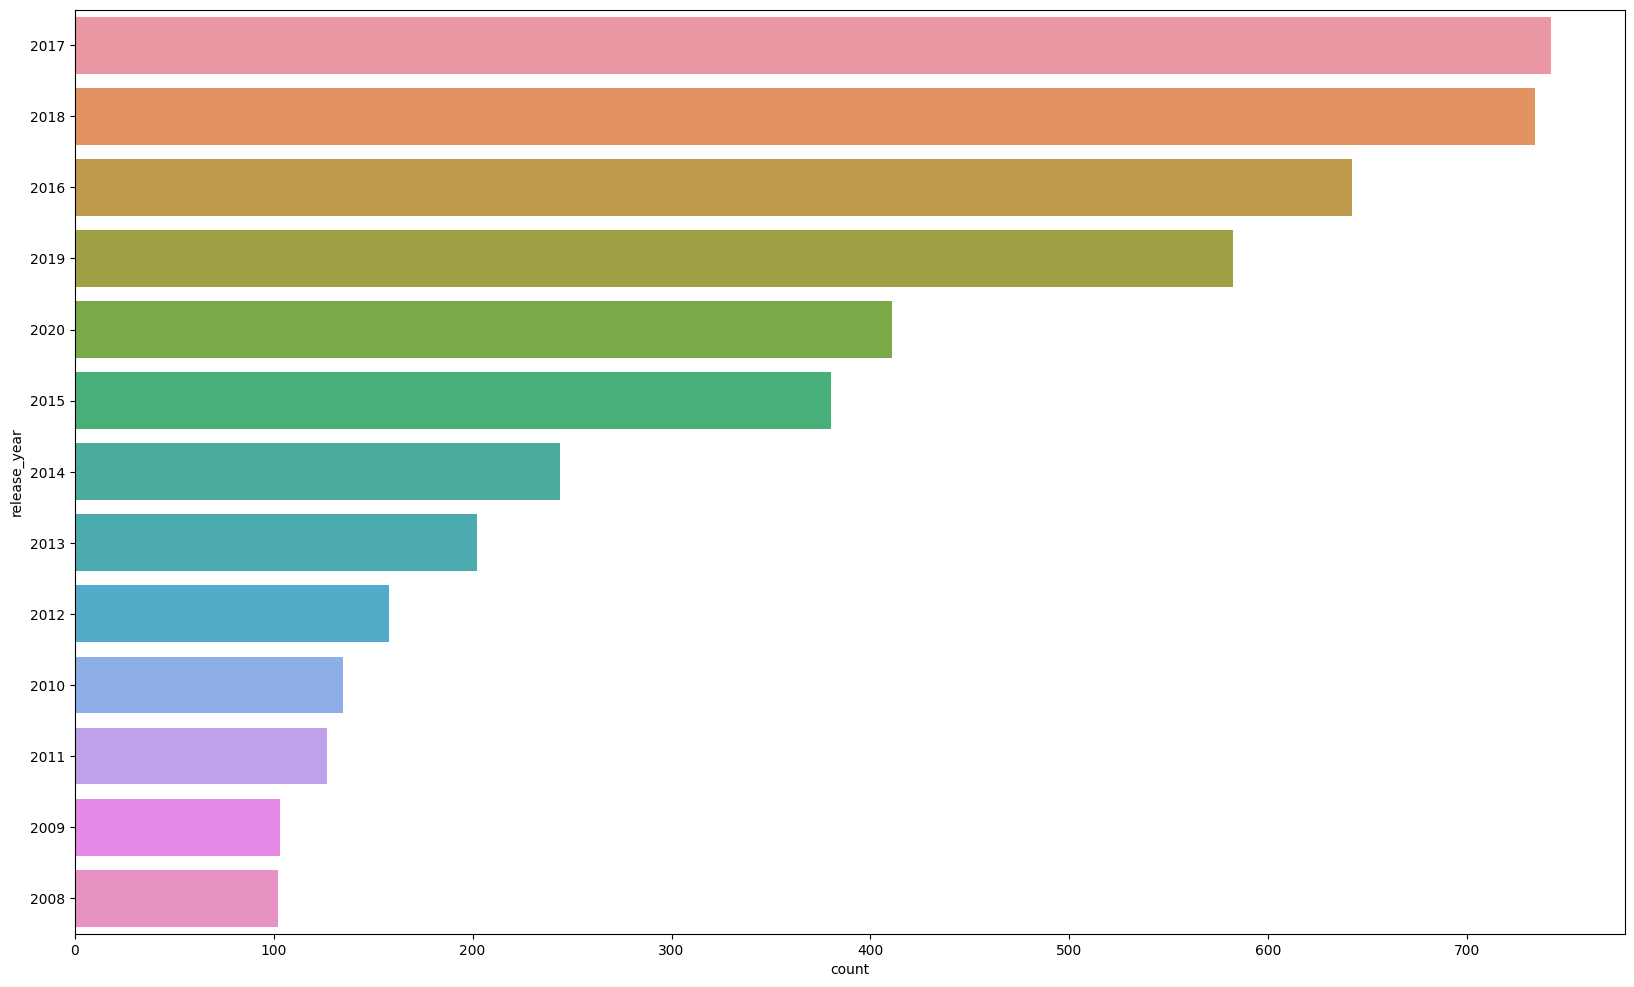

In [ ]:
# Chart - 4 visualization code
movies=df[df['type']=='Movie']
plt.figure(figsize=(20,12))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:13])

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

As shown above, there is a decrease in the number of shows added in the year 2020, which might be connected with covid-19 induced lockdowns, which halted the creation of shows.

#### Chart - 5

Text(0.5, 0, '')

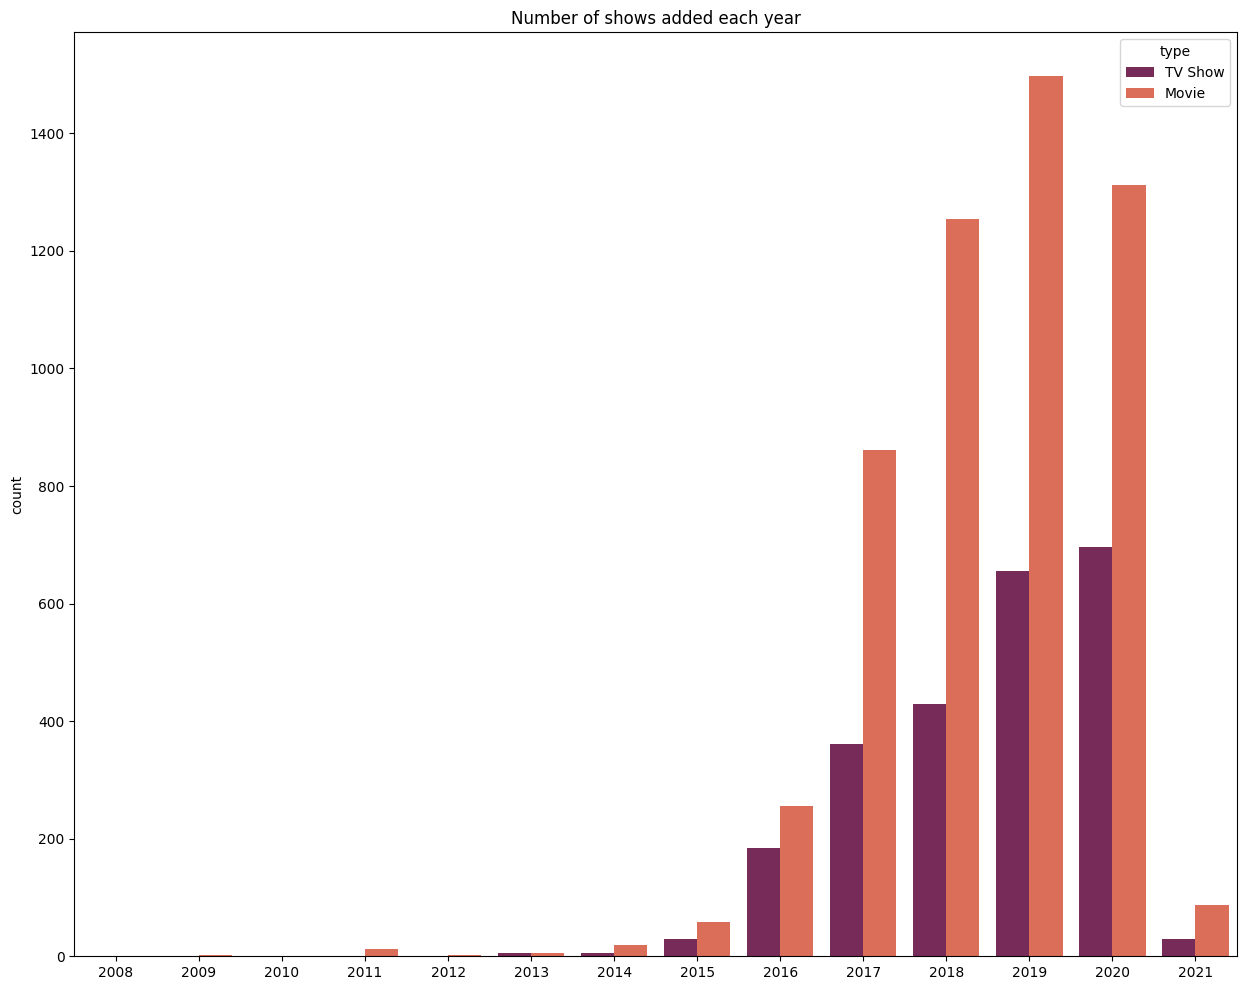

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize = (15,12)) 
sns.countplot(x= "year_added",data=df, hue='type', palette=('rocket'))
plt.title('Number of shows added each year')
plt.xlabel('')

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

There was a decrease in the number of movies in 2020, this pattern did not exist in the number of TV Shows added in the same year.

#### Chart - 6

Text(0.5, 0, '')

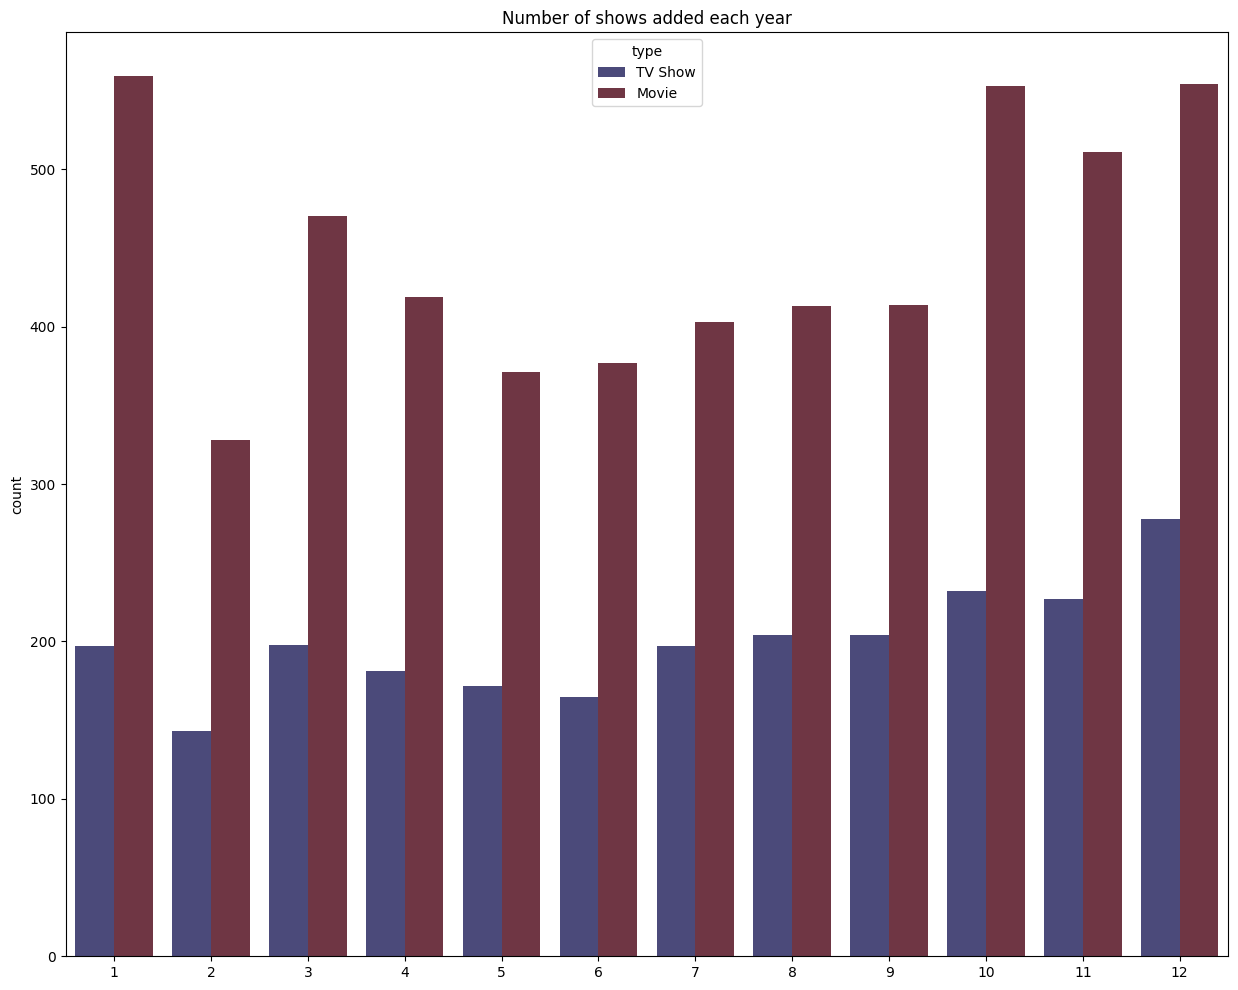

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (15,12)) 
sns.countplot(x= "month_added",data=df, hue='type', palette=('icefire'))
plt.title('Number of shows added each year')
plt.xlabel('')

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Over the year, large number of shows and movies were added in the month of October, November, December & January.

#### Chart - 7

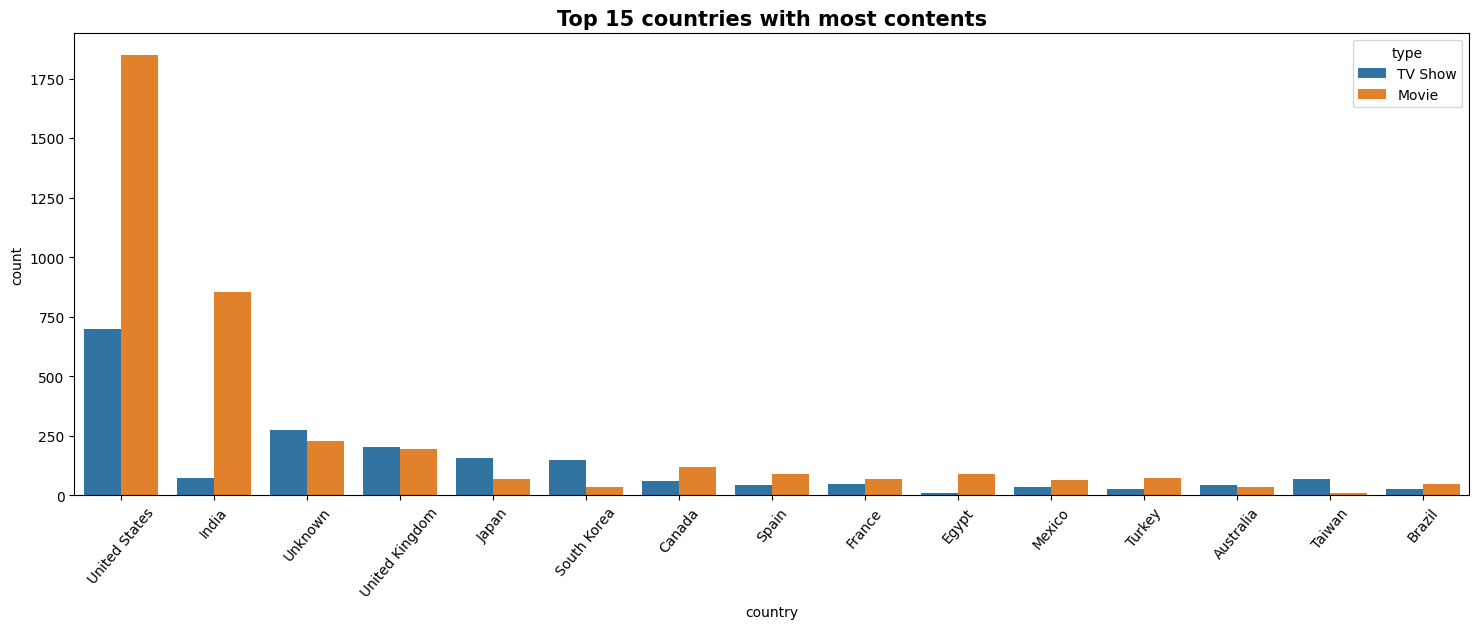

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(18,6))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

United States has the most content in both movies and tv shows where as egypt has lowest number of tv shows and south korea in movies.

#### Chart - 8

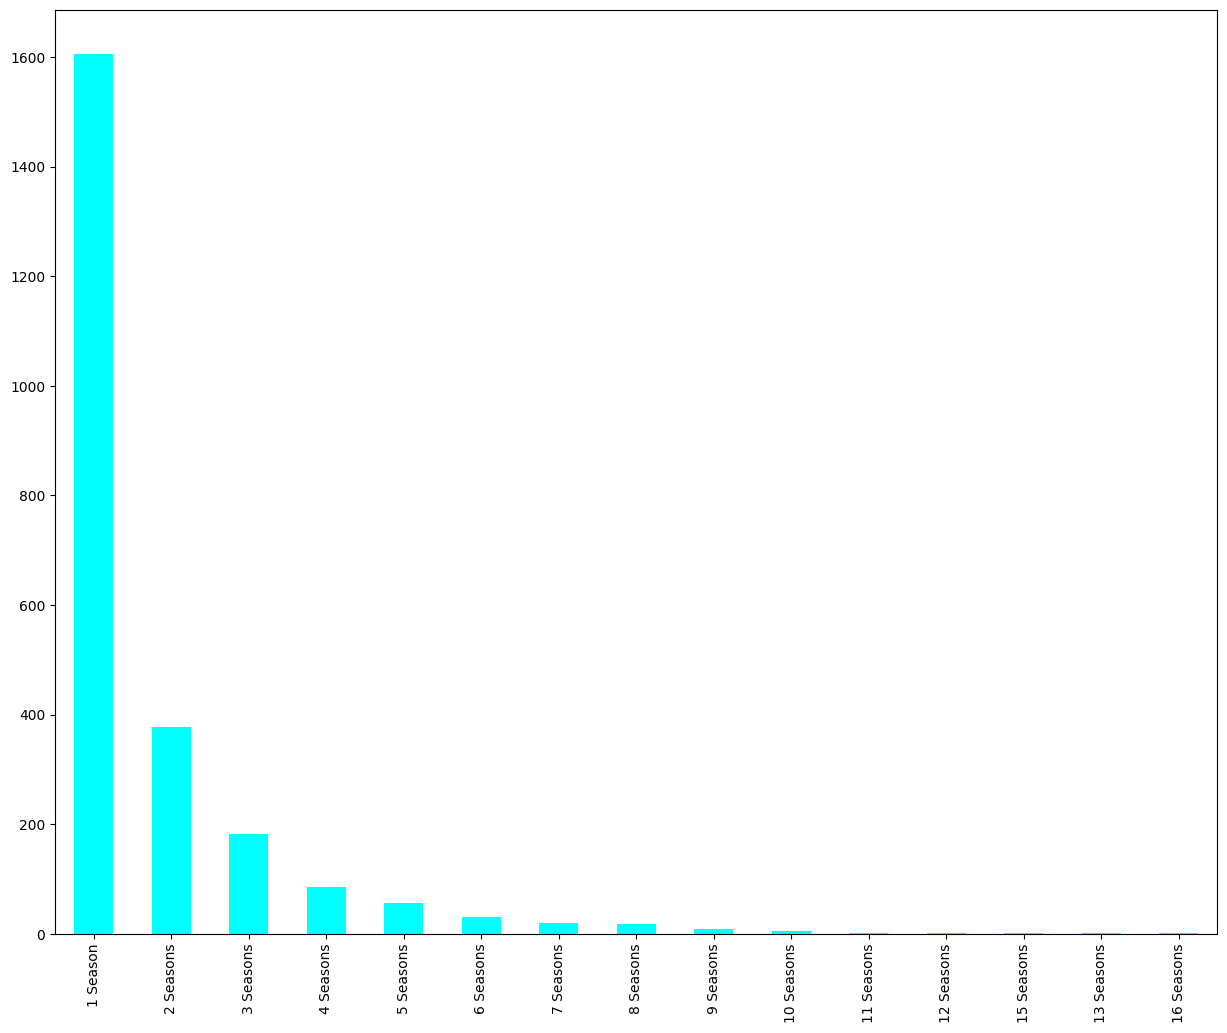

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,12))
df[df['type']=='TV Show']['duration'].value_counts().plot(kind='bar',color="cyan")
plt.show()  

##### 1. Why did you pick the specific chart?

A bar chart is a statistical approach to represent given data using vertical and horizontal rectangular bars.

##### 2. What is/are the insight(s) found from the chart?

There are more than 1600 tv shows with single season and less than 50 shows with 9 seasons duration and more than 9 seasons.

#### Chart - 9

<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

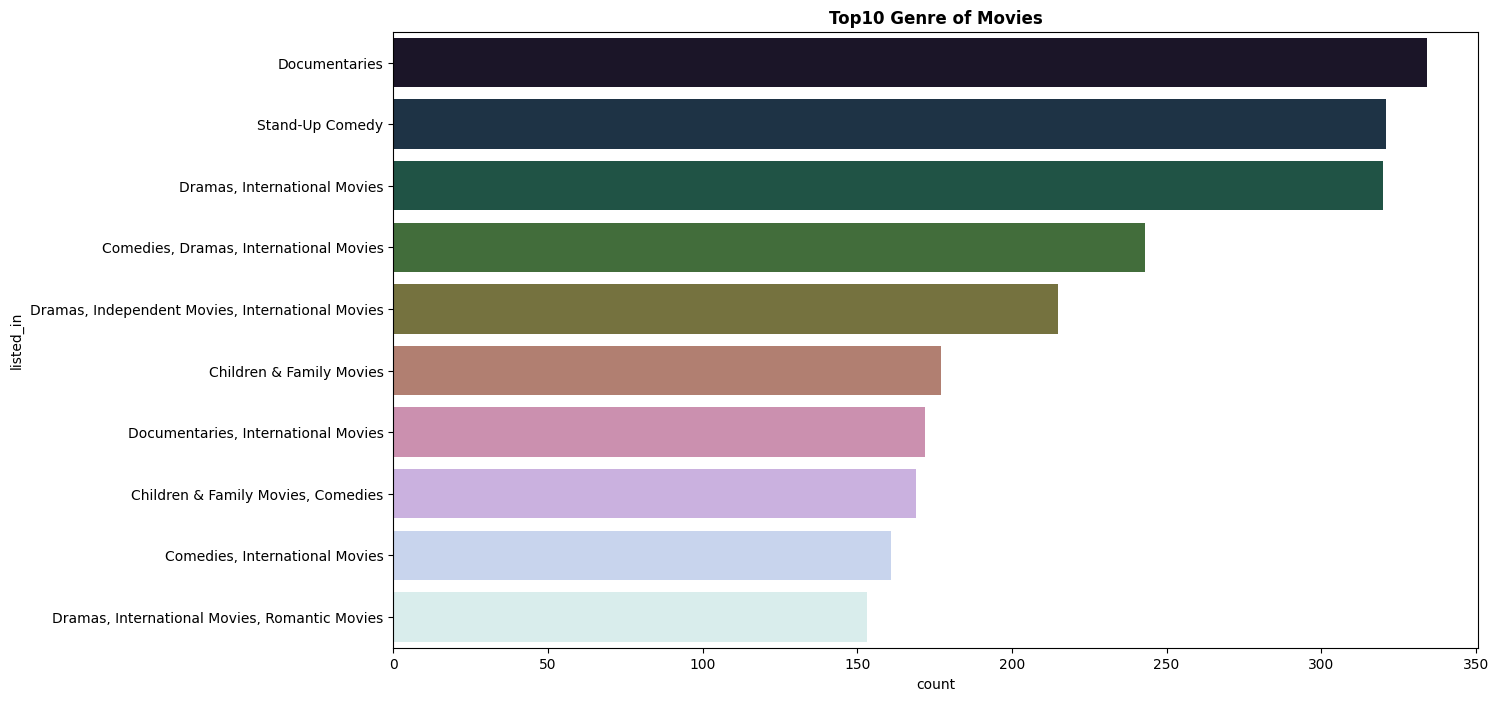

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(14,8))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],palette="cubehelix")

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

As shown above, we found drama has large value_counts of movies and comedies has the second large value_counts in movies.

#### Chart - 10

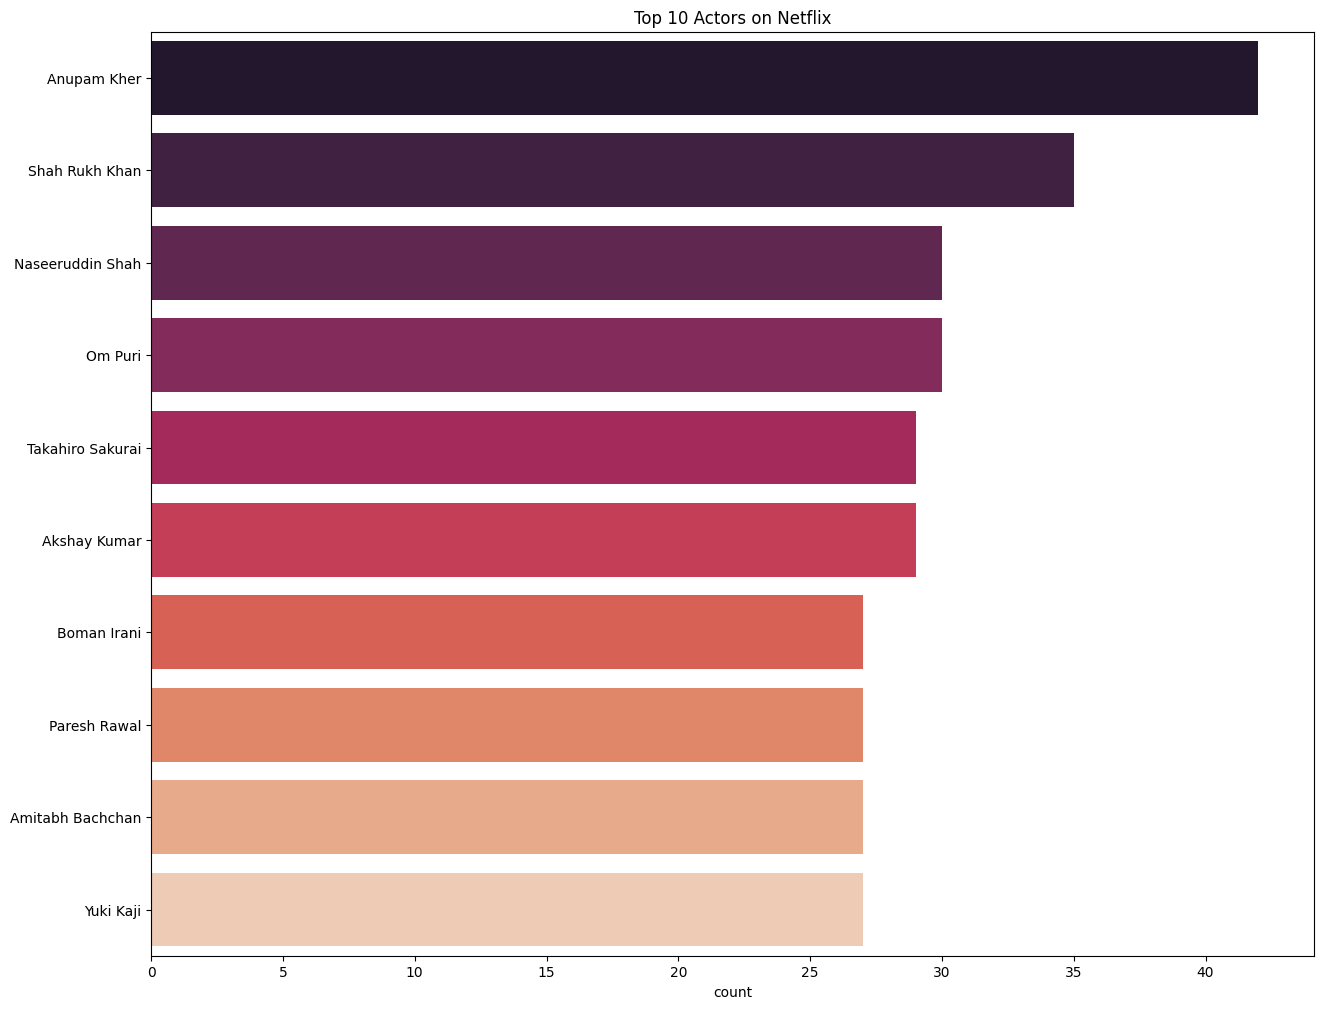

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(15,12))
actor = df[df.cast != 'Unknown'].set_index('title').cast.str.split(', ', expand= True).stack().reset_index(level=1, drop=True)
sns.countplot(y= actor, order= actor.value_counts().index[:10], palette='rocket')
plt.title('Top 10 Actors on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Anupam Kher, Shahrukh Khan, Om Puri/Naseeruddin Shah play highest number of role in the movies.

#### Chart - 11

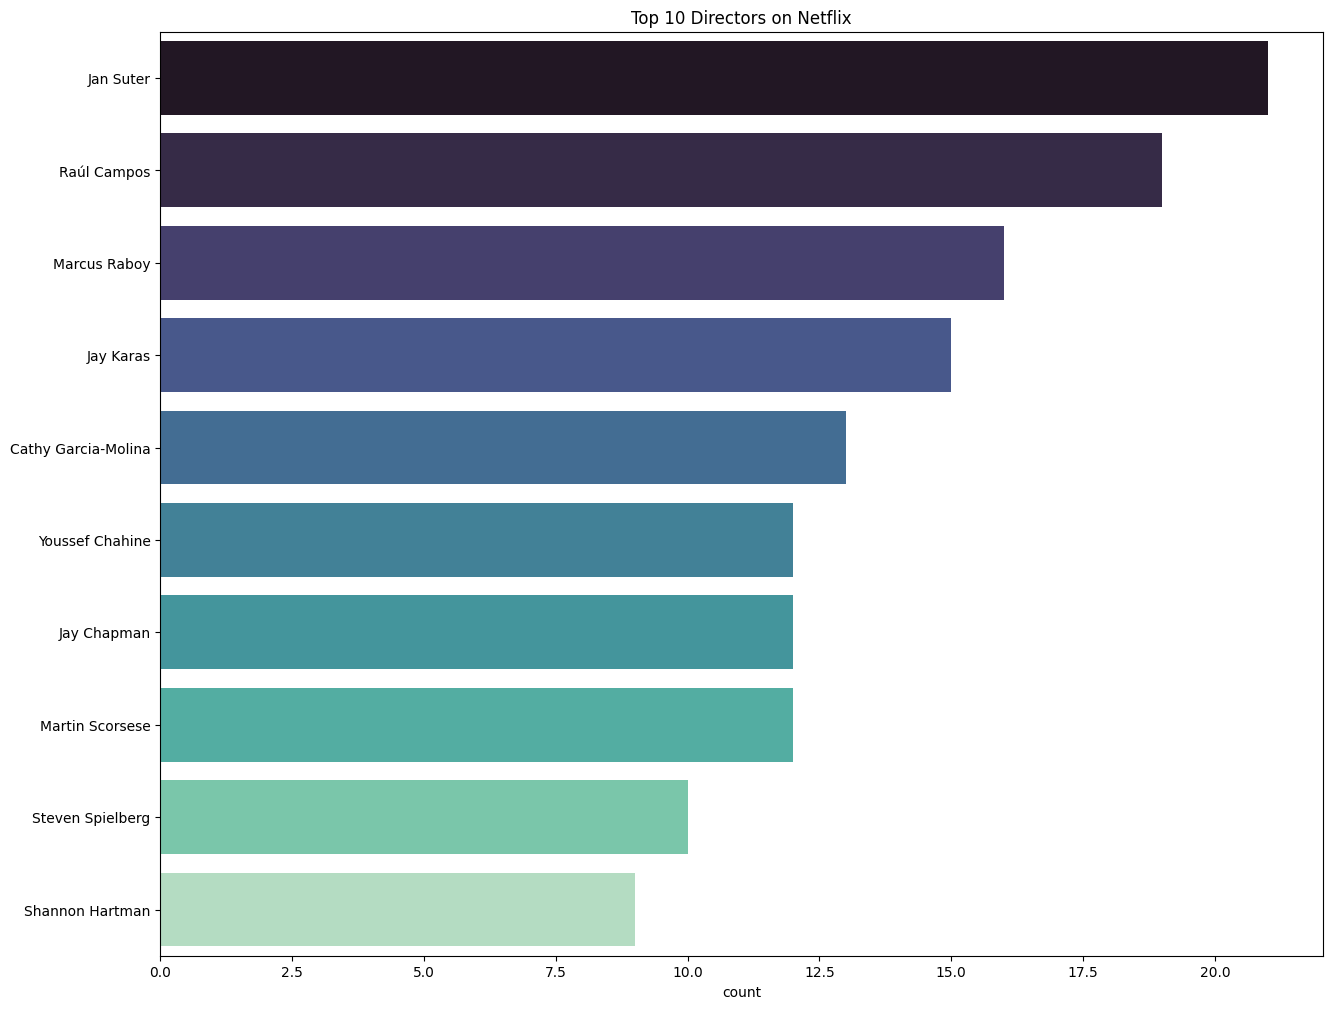

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(15,12))
directors = df[df.director != 'Unknown'].set_index('title').director.str.split(', ', expand= True).stack().reset_index(level=1, drop=True)
sns.countplot(y= directors, order= directors.value_counts().index[:10], palette='mako')
plt.title('Top 10 Directors on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos, Jan Suter directed most number of TV Shows & Movies.

#### Chart - 12

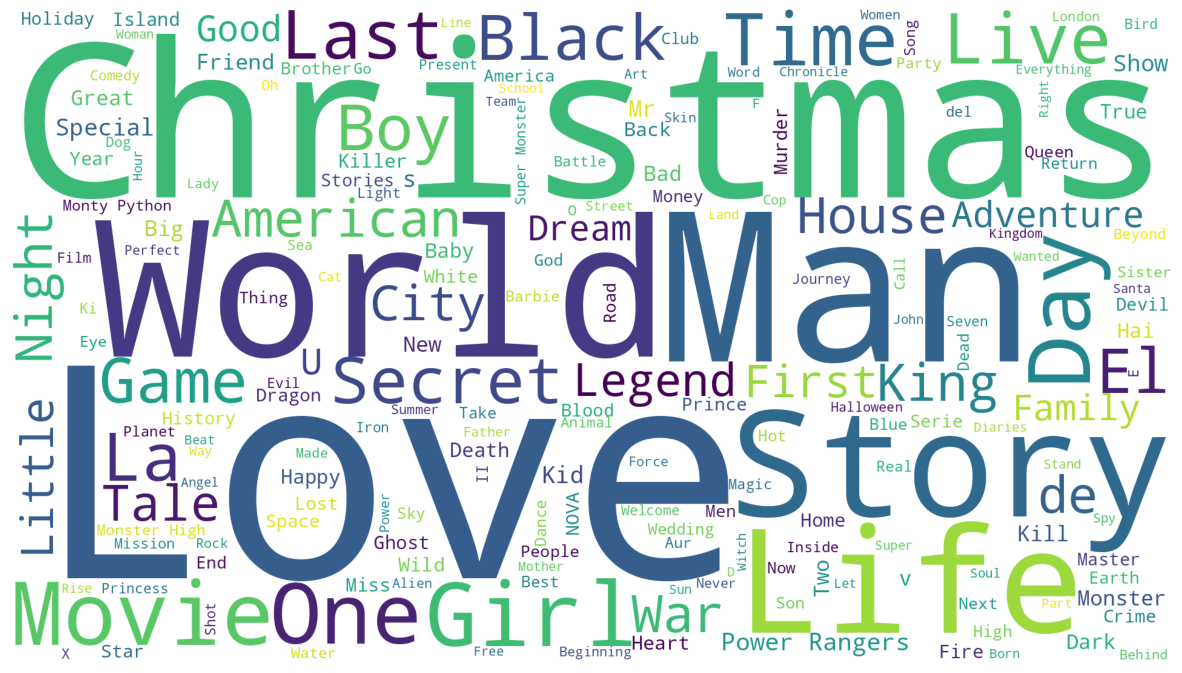

In [ ]:
# Chart - 12 visualization code

# ploting cloud for country
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Most of the common words present in description column are love, girl, life, love, christmas, world, story, friend.

#### Chart - 13

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

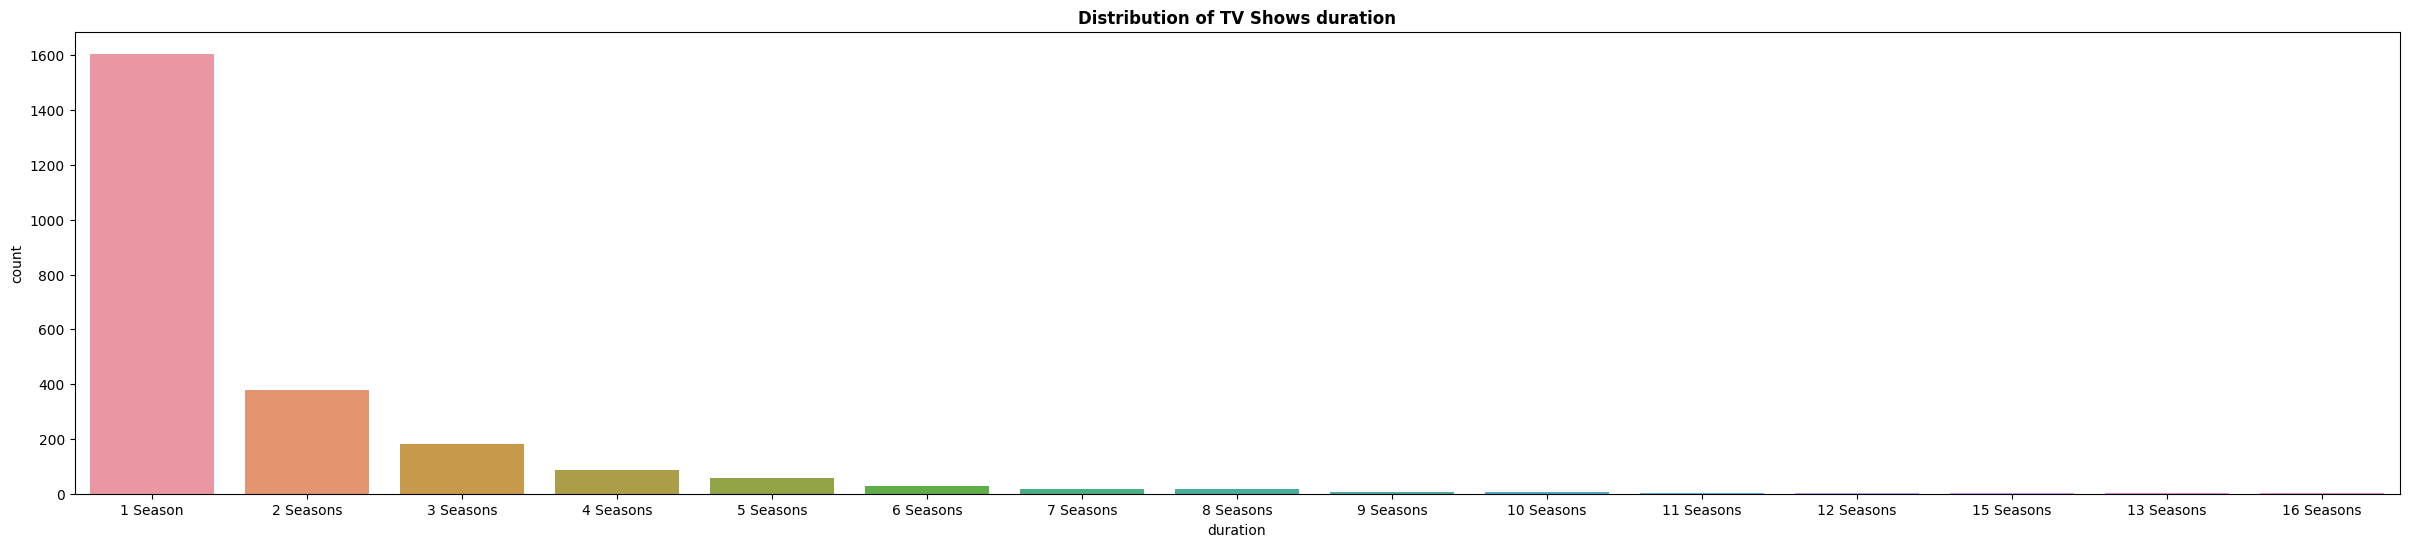

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

###  Handling Outliers

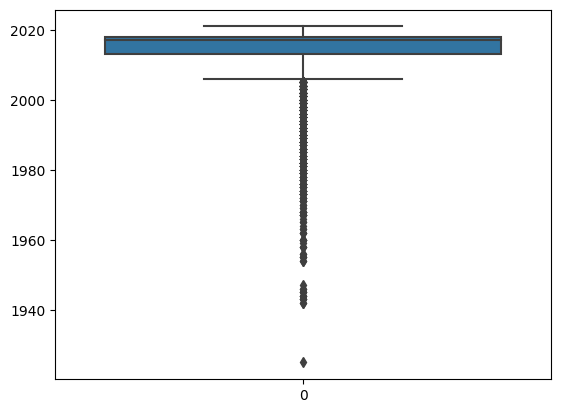

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df['release_year'])
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since, almost all the data present in textual format except release year.
The data that we need to create cluster/building model are present in textual format. So, there is no need to perform handling outlier.

# **Data Processing**

In [ ]:
# Using the original dataset for clustering since
# It does not require handling missing values
df1 = df.copy()

In [ ]:
df1.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column
df1['clustering_attributes'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description'])

In [ ]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

#  3. **Removing Punctuations**

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df1['clustering_attributes'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies Dramas International Movies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing non-ASCII characters**

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_non_ascii(words):
  """Function to remove non-ASCII characters"""
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

In [ ]:
# Remove non-ASCII characters
df['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [ ]:
df['clustering_attributes'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies Dramas International Movies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing Stopwords**

In [ ]:
# Remove Stopwords
sen = stopwords.words('english')
# # Displaying the stopwords
np.array(sen)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Function to remove stop words
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sen]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df['clustering_attributes'] = df['clustering_attributes'].apply(remove_stopwords)

In [ ]:
# Select the 50 number of clusters for the dataset
df['clustering_attributes'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies dramas international movies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

#  **Removing Lemmatization**

In [ ]:
# Rephrase Text
# Function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
df['clustering_attributes'] = lemmatize_verbs(df['clustering_attributes'])

In [ ]:
print(df['clustering_attributes'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies dramas international movies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

# **Tokenization**

In [ ]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

In [ ]:
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
print(df['clustering_attributes'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'dramas', 'international', 'movies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


# **Text Vectorization**

In [ ]:
# Vectorizing Text
clustering_vectorization = df['clustering_attributes']

In [ ]:
# Tokenization
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectorization)

In [ ]:
x.shape

(7770, 20000)

In [ ]:
X = x.toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

Answer Here.

# **Reducing Dimensionality using PCA**

In [ ]:
# Using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)

PCA(random_state=40)

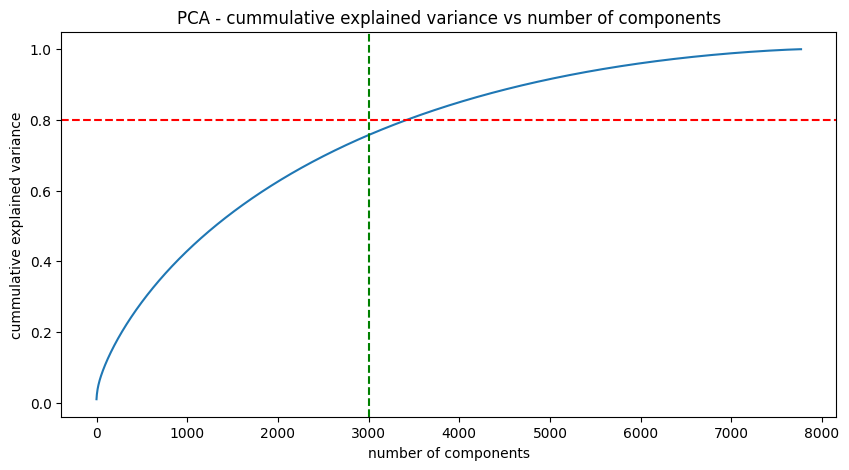

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cummulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')
plt.axhline(y=0.8, color='red', linestyle='--')
plt.axvline(x=3000, color='green', linestyle='--')
plt.show()

### 4. Feature Manipulation & Selection

In [ ]:
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

In [ ]:
x_pca = pca.transform(X)

In [ ]:
x_pca.shape

(7770, 4000)

## ***7. ML Model Implementation***

### K-Means Clustering
K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data. Instead, it relies on the inherent structure of the data to group the samples into clusters.

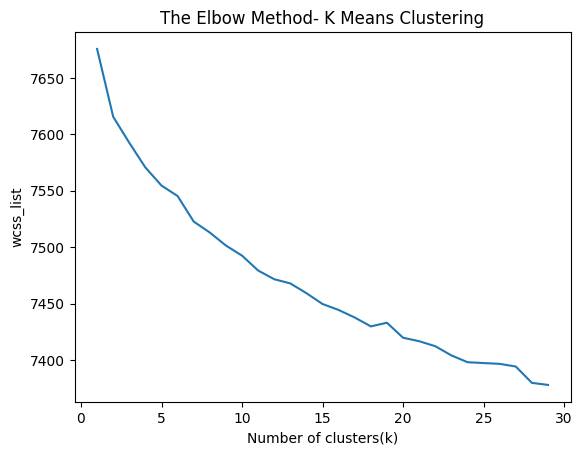

In [ ]:
# Elbow method to find the optimal value of k.
wcss_list = []

# Using for loop for iterations from 1 to 30.
for i in range(1,30):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 33)
  kmeans.fit(X)
  wcss_list.append(kmeans.inertia_)
plt.plot(range(1,30), wcss_list)
plt.title('The Elbow Method- K Means Clustering')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

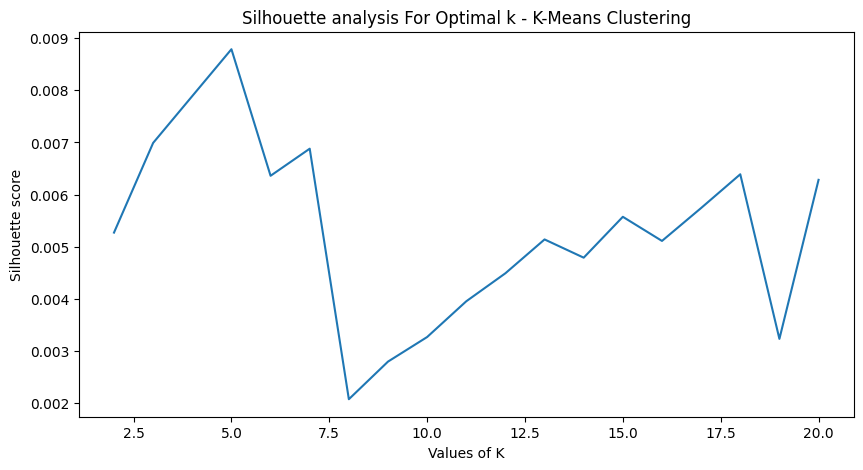

In [ ]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,21)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # Initialize K-Means
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # Silhouette Score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - K-Means Clustering')
plt.show()

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Evaluation metrics - distortion Sillhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)
# 
print((kmeans_distortion,kmeans_silhouette_score))

(6353.487099070893, 0.006360709657495671)


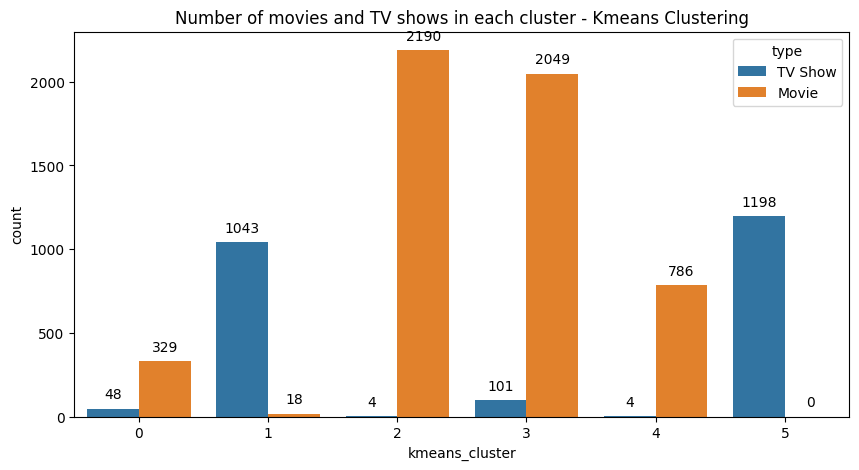

In [ ]:
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

### Hierarchical Clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

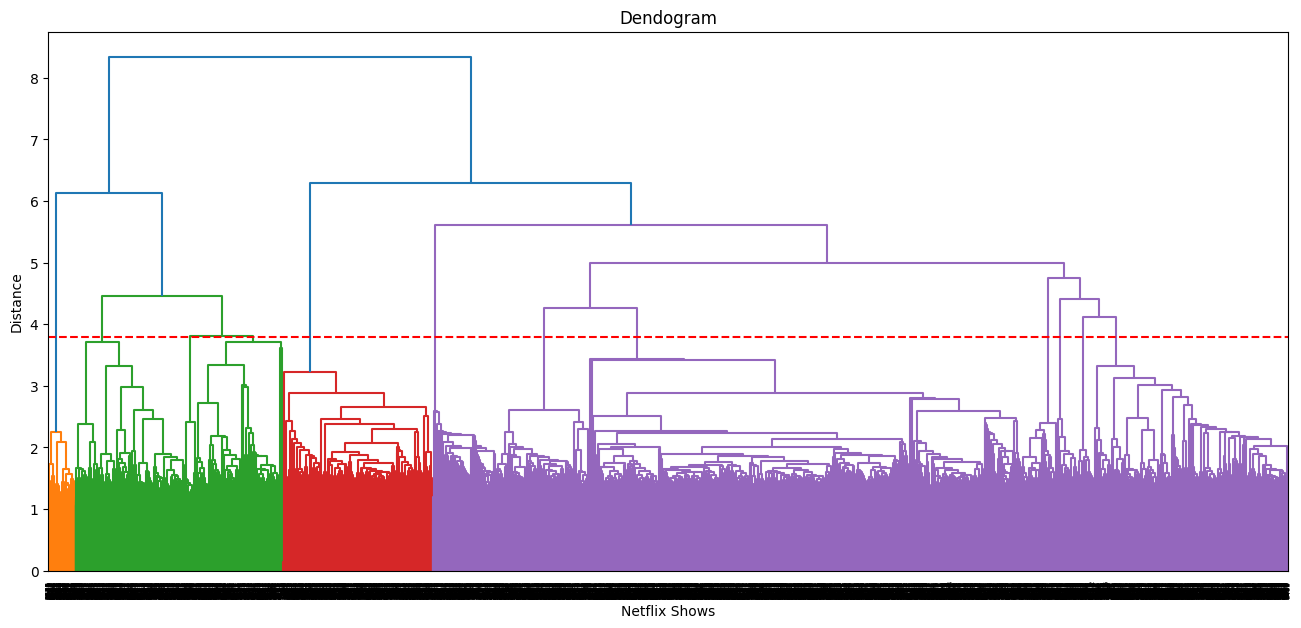

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(16, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([ 3,  3, 10, ...,  4,  0,  4])

In [ ]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

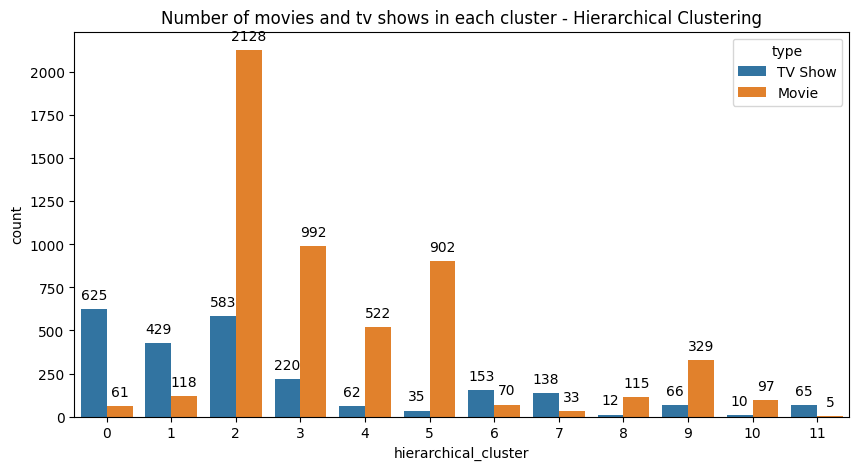

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize =(10,5))
q = sns.countplot(x='hierarchical_cluster', data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [111]:
# Building a wordcloud for the movie descriptions
def hierarchical_wordcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)
  # Iterate through the csv file
  for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:

    # Typecast each val to str
    val = str(val)

    # Split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range (len(tokens)):
      tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

      wordcloud = WordCloud(width = 700, height = 700,
                      background_color = 'white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)
    return hierarchical_wordcloud

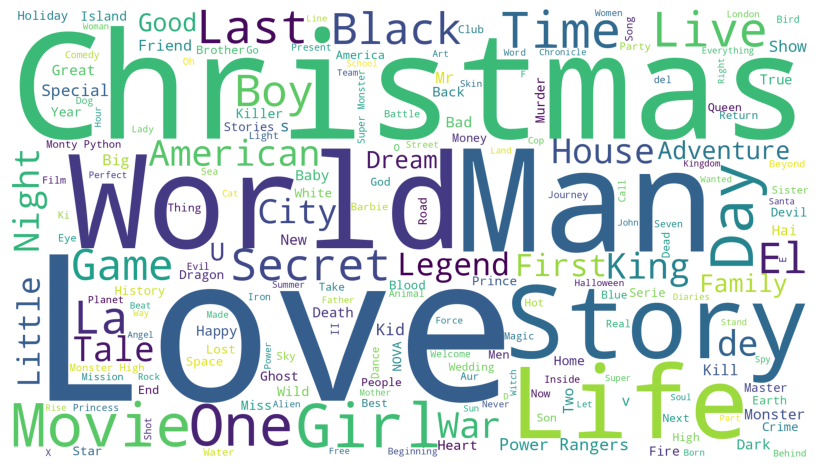

In [113]:
# Plot the WordCloud image                      
plt.figure(figsize = (8,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# **Using Content based recommender system**

In [157]:
# defining a new df for building a recommender system
recommender_df = df.copy()

In [158]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [159]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [160]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [161]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [165]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [167]:
cosine_similarity.shape

(7770, 7770)

In [168]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [170]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Little Baby',
 'My Mister',
 'Extracurricular',
 'Miss Panda & Mr. Hedgehog',
 'Chef & My Fridge',
 'Busted!']

In [171]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Prank Encounters',
 'The Umbrella Academy',
 'Haunted',
 'Zombie Dumb',
 'Warrior Nun',
 'Scream',
 'Nightflyers',
 'Kiss Me First',
 'The Vampire Diaries']

In [172]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'London Spy',
 'Giri / Haji',
 'The Murder Detectives',
 'My Hotter Half',
 'I AM A KILLER: RELEASED']

In [173]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['Rica, Famosa, Latina',
 'Get Shorty',
 'The Good Cop',
 'The Expanding Universe of Ashley Garcia',
 'Better Call Saul',
 'Dramaworld',
 'Jack Taylor',
 "Marvel's Iron Fist",
 'Love Rhythms - Accidental Daddy',
 'L.A.’s Finest']

In [176]:
# Recommendations for 'XXX'
recommend_10('XXX')

'Invalid Entry'

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***